In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv('classify_titles_allnewspapers.csv')

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)
df.dropna(inplace=True)
df.head(5)

,title,0-incident/single patient 1-awareness/campaign,score
0,Juvenile users of Chinese gay app contract HIV,0,0.06535297
1,21dcangr-ctte-cGNE54S5ME3jpgjpg,1,0.74127805
2,A year that saw Tamil Nadu's health sector sta...,1,0.6296007
3,‘Many combination drugs not approved by regula...,0,0.087785706
4,HIV reality check,0,0.12520814


In [4]:
df['0-incident/single patient 1-awareness/campaign'] = df['0-incident/single patient 1-awareness/campaign'].astype('str')
df = df[df['0-incident/single patient 1-awareness/campaign'].map(len) < 2]
df.head(5)

,title,0-incident/single patient 1-awareness/campaign,score
0,Juvenile users of Chinese gay app contract HIV,0,0.06535297
1,21dcangr-ctte-cGNE54S5ME3jpgjpg,1,0.74127805
2,A year that saw Tamil Nadu's health sector sta...,1,0.6296007
3,‘Many combination drugs not approved by regula...,0,0.087785706
4,HIV reality check,0,0.12520814


In [5]:
class_count = df.groupby(['0-incident/single patient 1-awareness/campaign']).agg('count').apply(lambda x: x.tolist()).to_dict()['score']
class_count

{'0': 13590, '1': 13401}

In [6]:
class_count['Incident_Single Patient'] = class_count.pop('0')
class_count['Awareness_Campaign'] = class_count.pop('1')

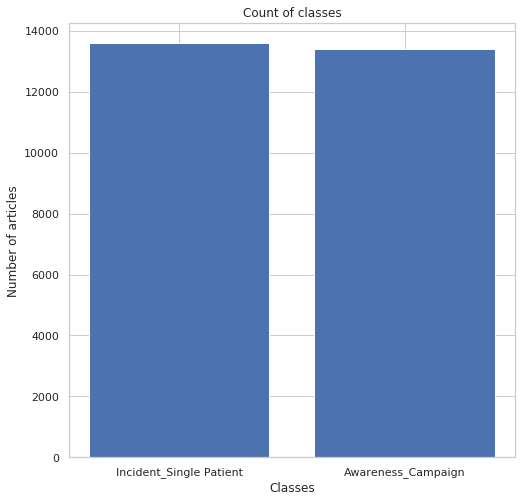

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.bar(range(len(class_count)), list(class_count.values()), align='center', label=class_count.keys())
plt.xticks(range(len(class_count)), list(class_count.keys()))
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.title('Count of classes')
plt.savefig('Count_of_classes.')
plt.show()

In [8]:
df['score'] = df['score'].astype('float')
class_score_avg = df.groupby(['0-incident/single patient 1-awareness/campaign']).agg({'score' : 'mean'}).apply(lambda x: x.tolist()).to_dict()['score']
class_score_avg['Incident_Single Patient'] = class_score_avg.pop('0')
class_score_avg['Awareness_Campaign'] = class_score_avg.pop('1')

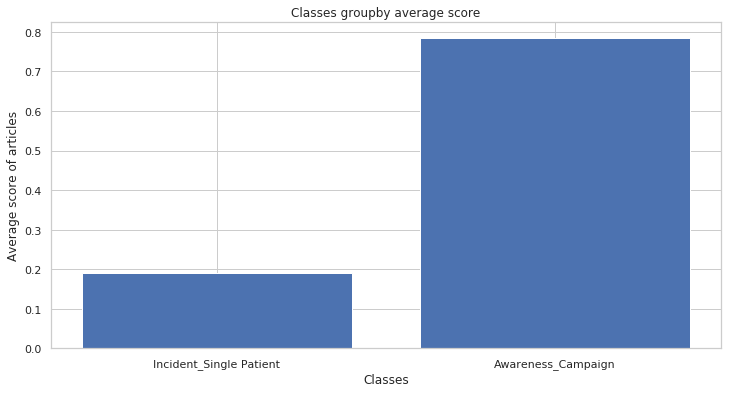

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.bar(range(len(class_score_avg)), list(class_score_avg.values()), align='center', label=class_score_avg.keys())
plt.xticks(range(len(class_score_avg)), list(class_score_avg.keys()))
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Average score of articles', fontsize=12)
plt.title('Classes groupby average score')
plt.savefig('Classes_groupby_average_score.png')
plt.show()